## Team Assignment \#3 - Team MIA

Date: September 20th, 2024

Authors: <br>
Aryan Laxman Sirohi <br>
Ashley Xu <br>
Yash Hegde <br>

Please ensure all dependencies are installed, they are listed in the code block below

## Data Context and Data Sampling


This dataset is called the [**Welltory COVID-19 and Wearables Open Data Research dataset**](https://github.com/Welltory/hrv-covid19/tree/master) which is used to analyze the impact of COVID-19 on various health parameters that are collected by wearable devices such as Apple Watches and Fitbits. This dataset could be used to predict COVID-19 symptoms and determine if someone is infected early on.

This dataset covers a wide range of features mainly as time-series data for parameters such as blood pressure, heart rate, sleep quality, as well as survey responses from the Welltory app to gather user data on whether they are experiencing COVID-19 symptoms.

While this dataset does provide several useful pieces of information about user health, it does have limitations. Namely, this dataset appears to be a master dataset with every single users information in these datasets. This can cause issues because in time series health data, it would be ideal to isolate the data by user as it can become quite messy if all of the data is just kept together.


In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
! git clone https://github.com/Welltory/hrv-covid19.git

fatal: destination path 'hrv-covid19' already exists and is not an empty directory.


Below we can analyze an example of the sampling performed in time series data in this dataset.

We can create a new column called time_diff to see how often blood pressure is sampled and we can ignore the first value of each user_code because the difference doesn't separate between users so irrelevant numbers show up.

However, it is also evident that blood pressure is calculated quite randomly it doesn't appear to sample at a constant rate besides the occasional samples every 3 hours which likely shows that blood pressure doesn't change too often so it seems like it was not necessary to sample more often, but there are some instances where 18 hours pass between sample readings which could show hardware issues.

This same inconsistency can also be observed in the heart rate csv file

In [111]:
blood_pressure_df = pd.read_csv('/content/hrv-covid19/data/blood_pressure.csv')
blood_pressure_df['measurement_datetime'] = pd.to_datetime(blood_pressure_df['measurement_datetime'])
blood_pressure_df.groupby(['user_code']).head()

blood_pressure_df['time_diff'] = blood_pressure_df['measurement_datetime'].diff()
blood_pressure_df = blood_pressure_df[['user_code', 'measurement_datetime', 'time_diff']]
blood_pressure_df.head(100)

,user_code,measurement_datetime,time_diff
0,01bad5a519,2020-04-29 22:33:33,NaT
1,01bad5a519,2020-04-30 01:33:33,0 days 03:00:00
2,01bad5a519,2020-04-30 09:16:38,0 days 07:43:05
3,01bad5a519,2020-04-30 12:16:38,0 days 03:00:00
4,01bad5a519,2020-05-01 06:58:06,0 days 18:41:28
...,...,...,...
95,6be5033971,2020-04-16 14:01:49,0 days 03:26:14
96,6be5033971,2020-04-16 14:48:00,0 days 00:46:11
97,6be5033971,2020-04-16 17:01:49,0 days 02:13:49
98,6be5033971,2020-04-16 17:42:19,0 days 00:40:30


In [112]:
hr_df = pd.read_csv('/content/hrv-covid19/data/heart_rate.csv')
hr_df['datetime'] = pd.to_datetime(hr_df['datetime'])
hr_df.groupby(['user_code']).head()

hr_df['time_diff'] = hr_df['datetime'].diff()
hr_df = hr_df[['user_code', 'datetime', 'time_diff']]
hr_df.head(100)

,user_code,datetime,time_diff
0,007b8190cf,2020-04-26 04:49:25,NaT
1,01bad5a519,2020-04-23 06:21:03,-3 days +01:31:38
2,01bad5a519,2020-04-23 09:46:01,0 days 03:24:58
3,01bad5a519,2020-04-23 14:05:06,0 days 04:19:05
4,01bad5a519,2020-04-24 03:41:18,0 days 13:36:12
...,...,...,...
95,01bad5a519,2020-06-10 17:36:15,0 days 11:07:13
96,01bad5a519,2020-06-10 17:36:15,0 days 00:00:00
97,01bad5a519,2020-06-11 13:10:19,0 days 19:34:04
98,01bad5a519,2020-06-12 07:39:03,0 days 18:28:44


## Overview of Entire Dataset

In the code block below, we can see all of the descriptive statistics for this dataset and overall the dataset is not very clean, it's got inconsistencies based on the time series information described above but there are also a variety of data types in this dataset and additionally the measurement_datetime column along with the other date_time columns in the dataset show up as generic object types when pandas has a datetime format which indicates that the formatting isn't correct in the dataset.

There is also a correlation matrix shown for each file in the dataset to show the relationship between the variables and there are some correlations in this dataset which indicates that there may be some linear relationships between features in the data.

Current File.............................................. weather.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             1717 non-null   object 
 1   day                   1717 non-null   object 
 2   avg_temperature_C     1717 non-null   float64
 3   atmospheric_pressure  1717 non-null   float64
 4   precip_intensity      1717 non-null   float64
 5   humidity              1717 non-null   float64
 6   clouds                1717 non-null   float64
dtypes: float64(5), object(2)
memory usage: 94.0+ KB
None
--------------------Dataset Description--------------------
       avg_temperature_C  atmospheric_pressure  precip_intensity     humidity  \
count        1717.000000           1717.000000       1717.000000  1717.000000   
mean           11.839221       

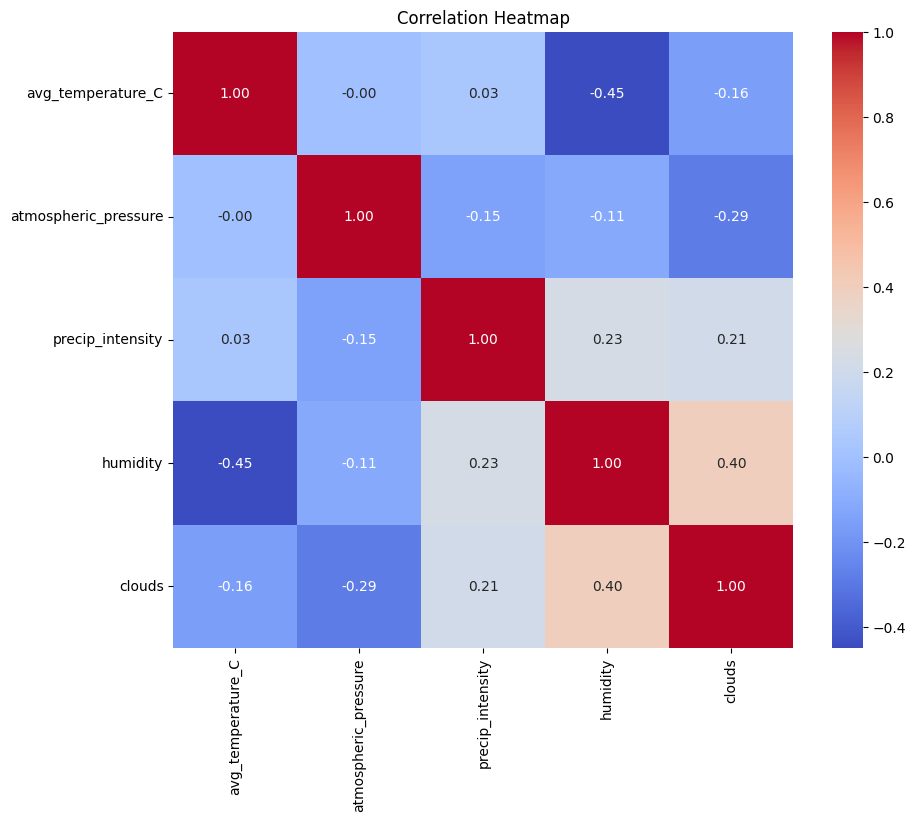

Current File.............................................. blood_pressure.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 721 non-null    object 
 1   measurement_datetime      721 non-null    object 
 2   diastolic                 721 non-null    int64  
 3   systolic                  721 non-null    int64  
 4   functional_changes_index  299 non-null    float64
 5   circulatory_efficiency    299 non-null    float64
 6   kerdo_vegetation_index    283 non-null    float64
 7   robinson_index            299 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 45.2+ KB
None
--------------------Dataset Description--------------------
        diastolic    systolic  functional_changes_index  \
count  721.000000  721.00000

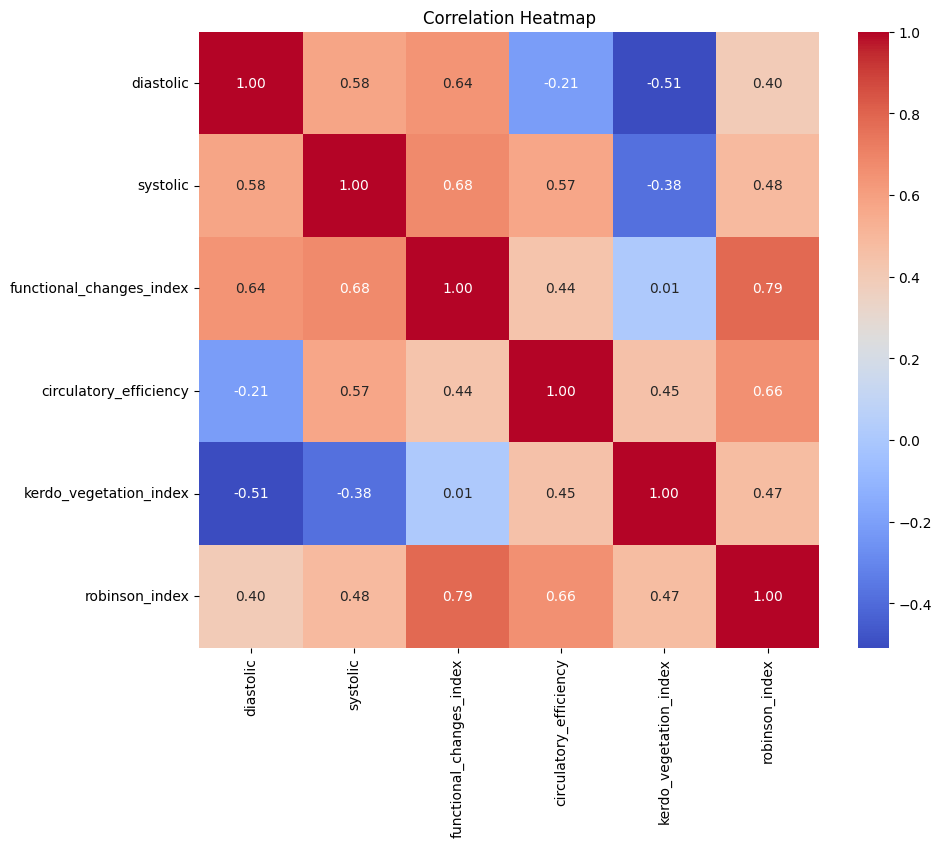

Current File.............................................. heart_rate.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523783 entries, 0 to 523782
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_code   523783 non-null  object
 1   datetime    523783 non-null  object
 2   heart_rate  523783 non-null  int64 
 3   is_resting  523783 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 16.0+ MB
None
--------------------Dataset Description--------------------
          heart_rate     is_resting
count  523783.000000  523783.000000
mean       90.856626       0.005546
std        25.054152       0.074266
min        10.000000       0.000000
25%        71.000000       0.000000
50%        87.000000       0.000000
75%       108.000000       0.000000
max       232.000000       1.000000
--------------------Variable Relationships--------------------


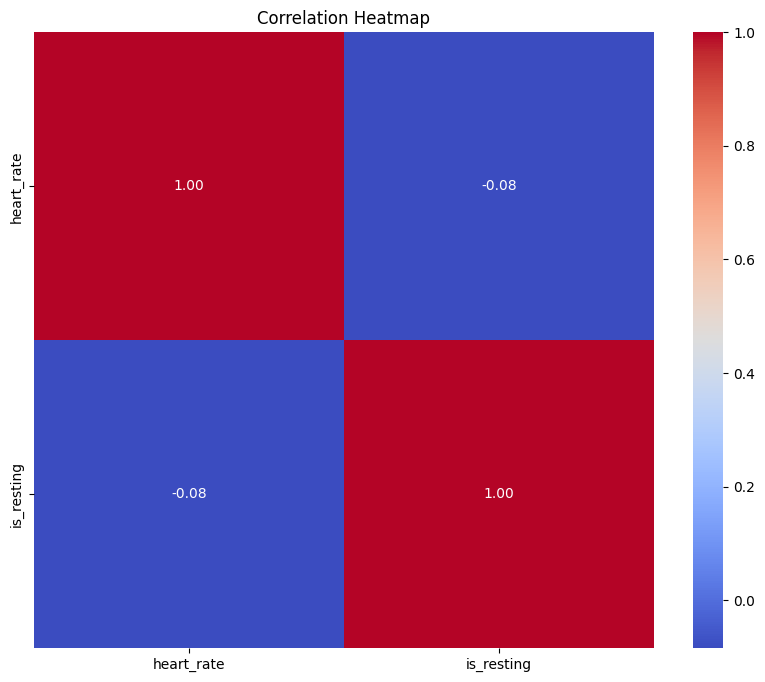

Current File.............................................. sleep.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             425 non-null    object 
 1   day                   425 non-null    object 
 2   sleep_begin           425 non-null    object 
 3   sleep_end             425 non-null    object 
 4   sleep_duration        425 non-null    float64
 5   sleep_awake_duration  9 non-null      float64
 6   sleep_rem_duration    7 non-null      float64
 7   sleep_light_duration  27 non-null     float64
 8   sleep_deep_duration   14 non-null     float64
 9   pulse_min             15 non-null     float64
 10  pulse_max             15 non-null     float64
 11  pulse_average         15 non-null     float64
dtypes: float64(8), object(4)
memory usage: 40.0+ KB
None
-

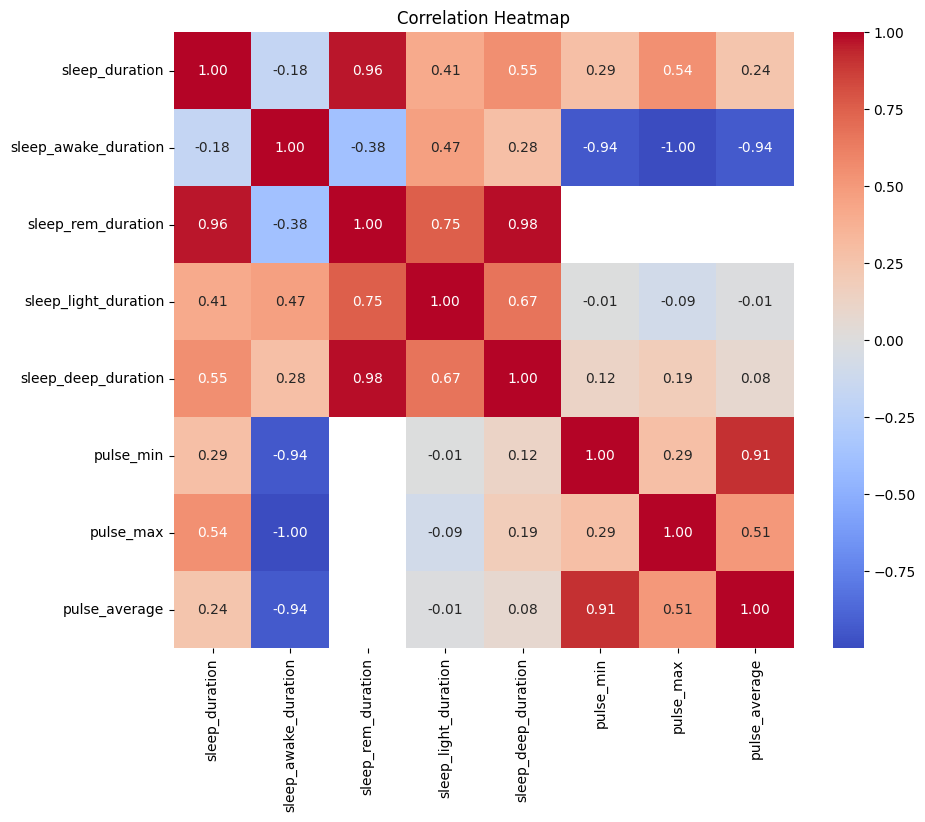

Current File.............................................. surveys.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_code   2259 non-null   object
 1   scale       2259 non-null   object
 2   created_at  2259 non-null   object
 3   value       2259 non-null   int64 
 4   text        2259 non-null   object
dtypes: int64(1), object(4)
memory usage: 88.4+ KB
None
--------------------Dataset Description--------------------
             value
count  2259.000000
mean      2.364763
std       1.554934
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       6.000000
--------------------Variable Relationships--------------------


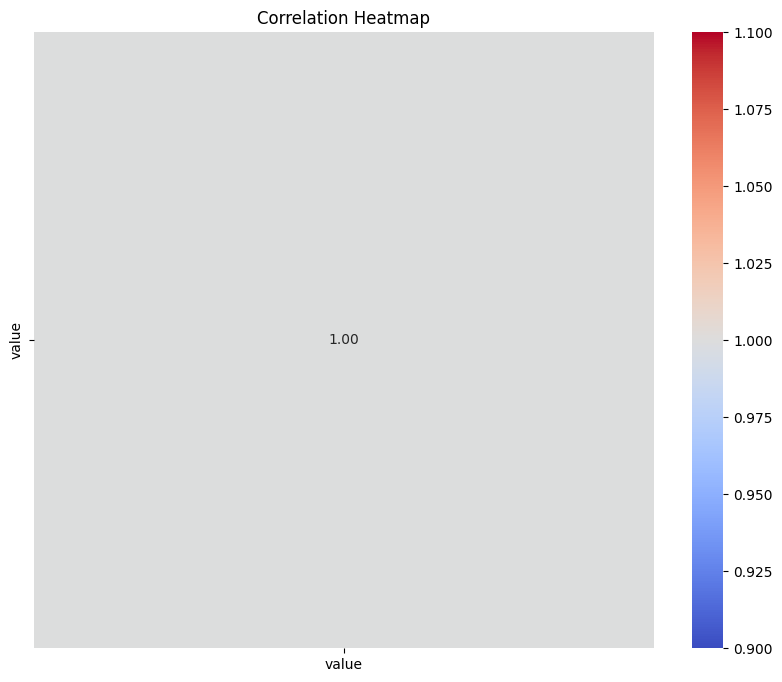

Current File.............................................. hrv_measurements.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245 entries, 0 to 3244
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_code             3245 non-null   object 
 1   rr_code               3245 non-null   object 
 2   measurement_datetime  3245 non-null   object 
 3   time_of_day           3245 non-null   object 
 4   bpm                   3245 non-null   int64  
 5   meanrr                3245 non-null   float64
 6   mxdmn                 3245 non-null   float64
 7   sdnn                  3245 non-null   float64
 8   rmssd                 3245 non-null   float64
 9   pnn50                 3245 non-null   float64
 10  mode                  3245 non-null   float64
 11  amo                   3245 non-null   float64
 12  lf                    3245 non-null   flo

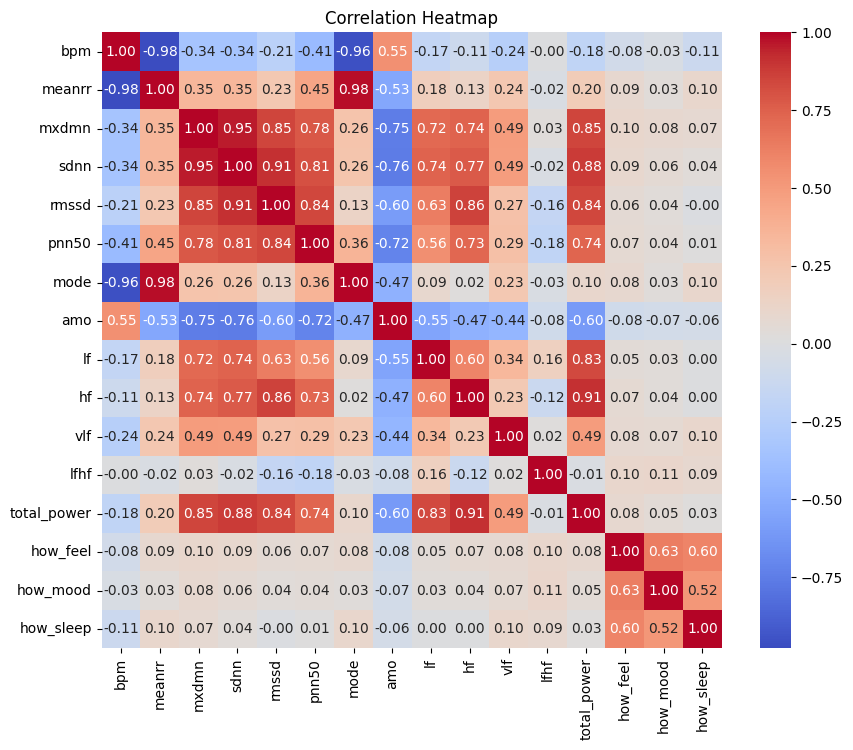

Current File.............................................. participants.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_code       185 non-null    object 
 1   gender          185 non-null    object 
 2   age_range       185 non-null    object 
 3   city            173 non-null    object 
 4   country         179 non-null    object 
 5   height          183 non-null    float64
 6   weight          185 non-null    float64
 7   symptoms_onset  147 non-null    object 
dtypes: float64(2), object(6)
memory usage: 11.7+ KB
None
--------------------Dataset Description--------------------
           height      weight
count  183.000000  185.000000
mean   169.976393   77.927757
std     12.400103   19.552541
min    132.080000   43.500000
25%    163.500000   63.500000
50%    168.000000  

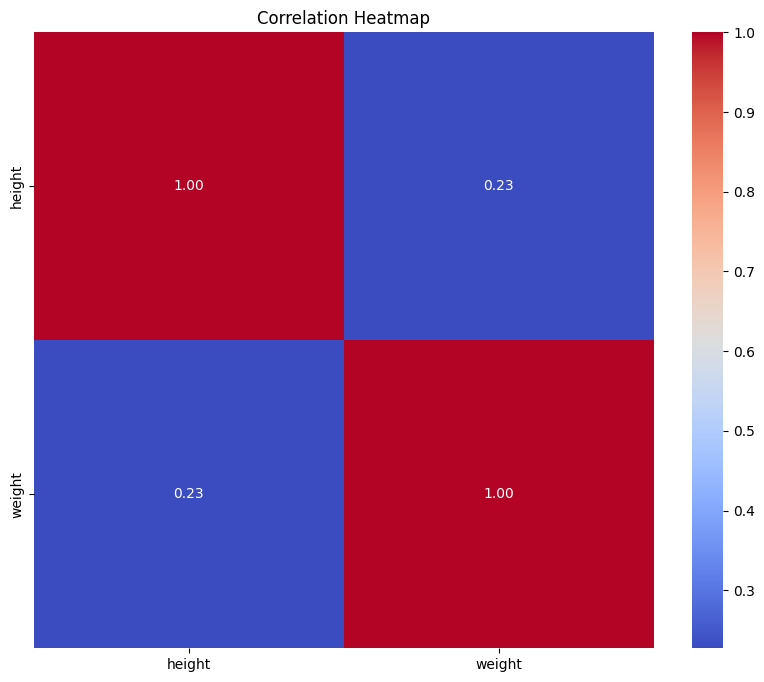

Current File.............................................. scales_description.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Scale        148 non-null    object
 1   Description  148 non-null    object
 2   Value        148 non-null    int64 
 3   Meaning      148 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
None
--------------------Dataset Description--------------------
            Value
count  148.000000
mean     2.331081
std      1.655288
min      1.000000
25%      1.000000
50%      1.500000
75%      3.250000
max      6.000000
--------------------Variable Relationships--------------------


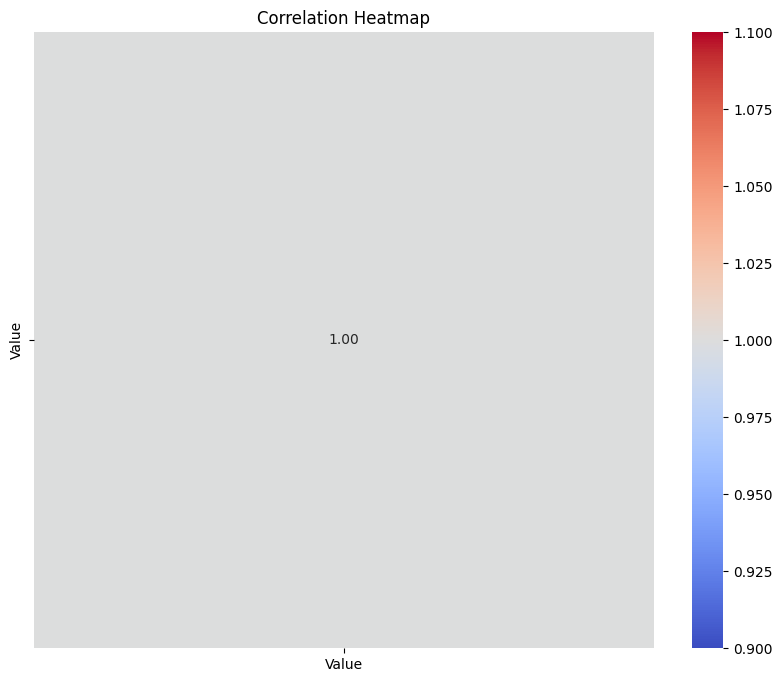

Current File.............................................. wearables.csv
--------------------Dataset Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   user_code                        3098 non-null   object 
 1   day                              3098 non-null   object 
 2   resting_pulse                    1515 non-null   float64
 3   pulse_average                    2089 non-null   float64
 4   pulse_min                        2089 non-null   float64
 5   pulse_max                        2089 non-null   float64
 6   average_spo2_value               40 non-null     float64
 7   body_temperature_avg             65 non-null     float64
 8   stand_hours_total                531 non-null    float64
 9   steps_count                      1968 non-null   float64
 10  distance          

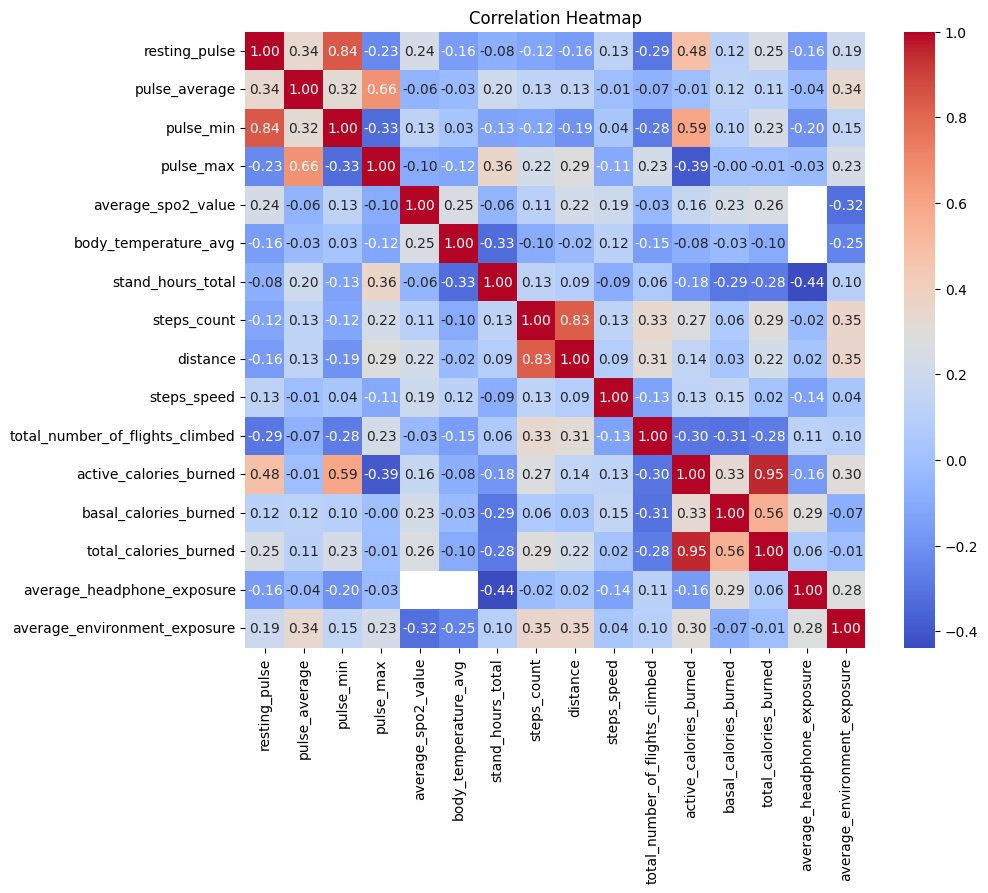

In [113]:
path = os.getcwd()
dir_path = path + "/hrv-covid19/data/"
files = os.listdir(dir_path)
for file in files:
  print("Current File..............................................", file)
  df = pd.read_csv(dir_path + file)
  print("--------------------Dataset Info--------------------")
  print(df.info())
  print("--------------------Dataset Description--------------------")
  print(df.describe())
  print("--------------------Variable Relationships--------------------")
  object_columns = df.select_dtypes(include=['object']).columns
  df = df.drop(columns=object_columns)
  corr = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
  plt.title('Correlation Heatmap')
  plt.show()


## Overview of Blood Pressure dataset

Examination of raw data in blood pressure CSV

In [114]:
blood_pressure_df = pd.read_csv('/content/hrv-covid19/data/blood_pressure.csv')
blood_pressure_df.head()

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-30 01:33:33,100,150,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.4
3,01bad5a519,2020-04-30 12:16:38,95,140,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-01 06:58:06,80,130,2.89,4000.0,NaN,104.0


Check size of dataframe

In [115]:
blood_pressure_df.shape

(721, 8)

Check for any null values in the dataset which shows hundreds of null values in 4 columns. These columns are calculated when heart rate data is available so the null values are not a cause for concern and we can just make them 0.

In [116]:
blood_pressure_df.isnull().sum()

,0
user_code,0
measurement_datetime,0
diastolic,0
systolic,0
functional_changes_index,422
circulatory_efficiency,422
kerdo_vegetation_index,438
robinson_index,422


## Dealing with missing/null values, outliers and duplicates

Check for any duplicated rows

In [117]:
blood_pressure_df.duplicated().sum()

0

No duplicated rows so no need to do anything

We can populate the aforementioned null values with 0 because they don't have heart rate data available for those time stamps and they don't impact the dataset.

In [118]:
blood_pressure_df['functional_changes_index'].fillna(0, inplace=True)
blood_pressure_df['circulatory_efficiency'].fillna(0, inplace=True)
blood_pressure_df['kerdo_vegetation_index'].fillna(0, inplace=True)
blood_pressure_df['robinson_index'].fillna(0, inplace=True)

In [119]:
blood_pressure_df.isnull().sum()

,0
user_code,0
measurement_datetime,0
diastolic,0
systolic,0
functional_changes_index,0
circulatory_efficiency,0
kerdo_vegetation_index,0
robinson_index,0


Now we can check for outliers in this dataset

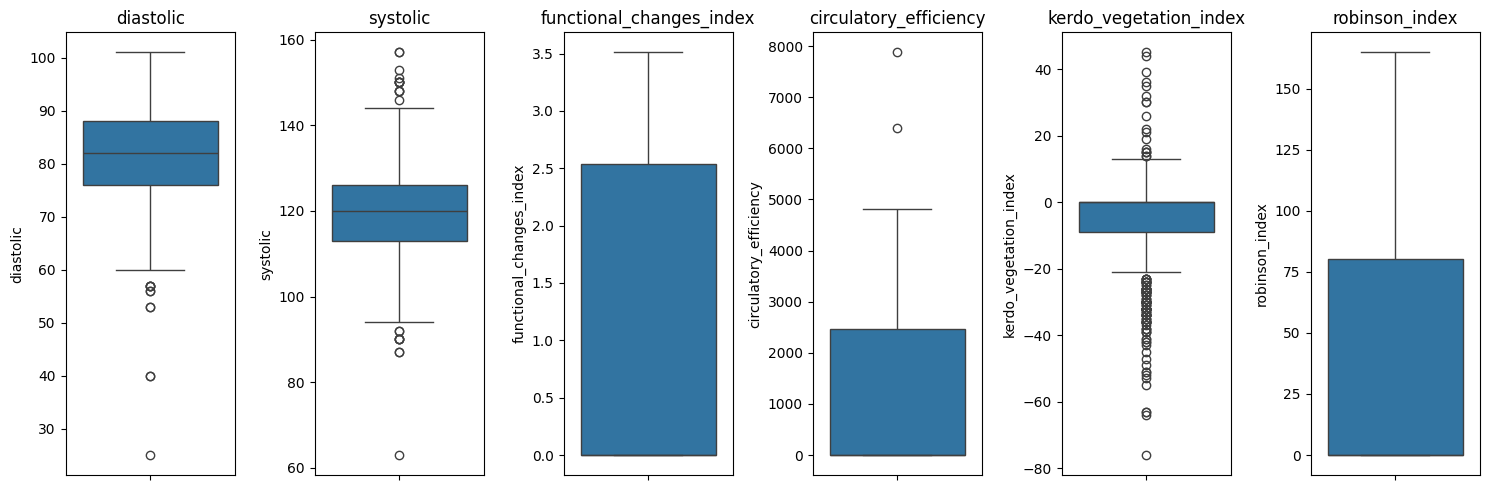

In [120]:
columns = blood_pressure_df.columns.to_list()
columns.remove('user_code')
columns.remove('measurement_datetime')
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Create a boxplot for each column
for i, col in enumerate(columns):
    sns.boxplot(data=blood_pressure_df[col], ax=axes[i])
    axes[i].set_title(col)

# Show the plot
plt.tight_layout()
plt.show()


There are outliers that are present in a lot of the columns here, namely **diastolic, systolic measurements** and the **circulatory efficiency** as well as the **kerdo vegetation index**

We can first check for extreme outliers using the 3xIQR (Interquartile Range) method and remove them because it's possible that standard variability in the dataset causes mild outliers but still accurately represents the dataset.

Because this is time series health data, it may make more sense to perform data imputation when extreme outliers arise, so instead of removing outliers entirely it makes more sense to replace them by linearly interpolating based on surrounding values

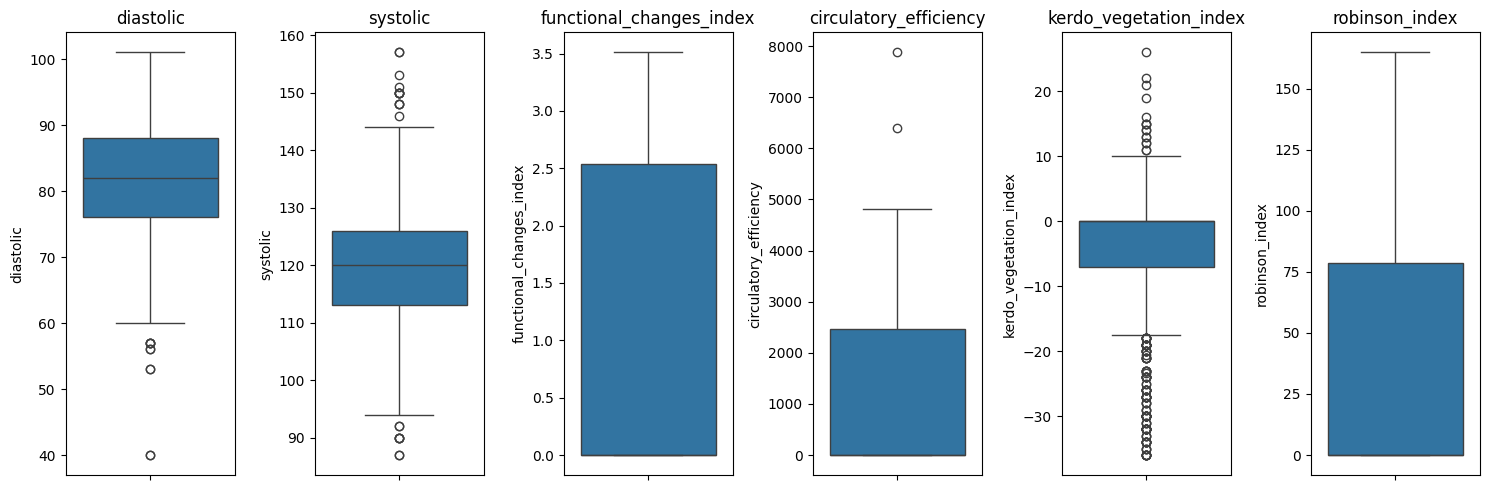

In [121]:
def get_extreme_outlier_bounds(df, column):
  # Find the quantile ranges
  Q1 = blood_pressure_df[column].quantile(0.25)
  Q3 = blood_pressure_df[column].quantile(0.75)

  # 3xIQR
  IQR_3 = (Q3-Q1)*3

  upper_bound = Q3 + IQR_3
  lower_bound = Q1 - IQR_3

  return upper_bound, lower_bound

def interpolate(df, column, upper_bound, lower_bound):
  # Replace extreme outliers with nan to prepare for interpolation
  df.loc[(df[column] > upper_bound) | (df[column] < lower_bound)] = float('nan')
  # interpolate extreme outlier
  df[column] = df[column].interpolate(method='linear')

  return df

columns = blood_pressure_df.columns.to_list()
columns.remove('user_code')
columns.remove('measurement_datetime')
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Create a boxplot for each column
for i, col in enumerate(columns):
  upper_bound, lower_bound = get_extreme_outlier_bounds(blood_pressure_df, col)
  blood_pressure_df = interpolate(blood_pressure_df, col, upper_bound, lower_bound)
  sns.boxplot(data=blood_pressure_df[col], ax=axes[i])
  axes[i].set_title(col)

# Show the plot
plt.tight_layout()
plt.show()



Interpolating the outliers shows a much better distribution of values as there are only mild outliers which retains the variability in the dataset without having extreme outliers skew the dataset.

## Overview of Heart Rate Dataset

In [122]:
hr_df = pd.read_csv('/content/hrv-covid19/data/heart_rate.csv')
hr_df.shape

(523783, 4)

Checking for Outliers in heart rate

<Axes: ylabel='heart_rate'>

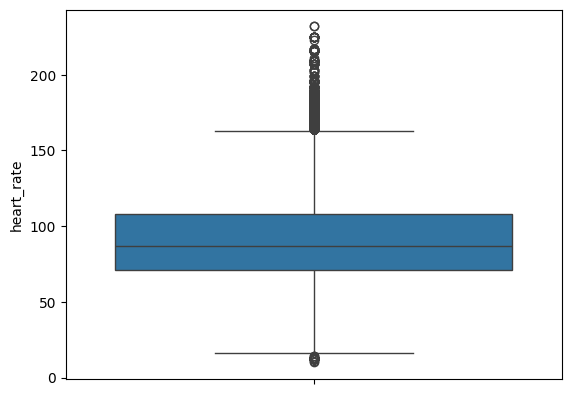

In [123]:
heart_rate = hr_df['heart_rate']
sns.boxplot(data=heart_rate)

In [124]:
def view_scales_desc_data():
  df = pd.read_csv('/content/hrv-covid19/data/scales_description.csv')
  return df

In [125]:
view_scales_desc_data()

,Scale,Description,Value,Meaning
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days
1,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,2,3 to 6 days
2,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,3,7 to 14 days
3,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,4,More than 14 days
4,S_COVID_COUGH,Symptom intensity: Coughing,1,User isn’t experiencing symptom
...,...,...,...,...
143,S_DIAB_REASON2,Whether the user is active enough,1,Is active enough
144,S_DIAB_REASON3,Whether the user eats healthy,1,Eats healthy
145,S_DIAB_REASON4,Whether the user has BP problems,1,No BP problems
146,S_DIAB_REASON5,Whether the user’s blood sugar is within the n...,1,Blood sugar is within the norm when taking the...


In [126]:
def view_wearable_data():
  df = pd.read_csv('/content/hrv-covid19/data/wearables.csv')

  filtered_df = df[['pulse_average', 'pulse_min', 'pulse_max']].dropna()

  return filtered_df

In [127]:
view_wearable_data()

,pulse_average,pulse_min,pulse_max
0,70.0,70.0,70.0
67,82.0,74.0,90.0
68,71.0,67.0,72.0
69,70.0,64.0,76.0
70,75.0,63.0,94.0
...,...,...,...
3092,81.0,81.0,81.0
3094,67.0,67.0,67.0
3095,81.0,81.0,81.0
3096,70.0,70.0,70.0


In [128]:
participants_df = pd.read_csv('/content/hrv-covid19/data/participants.csv')
participants_df.head()

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020


In [129]:
participants_df.isnull().sum()

,0
user_code,0
gender,0
age_range,0
city,12
country,6
height,2
weight,0
symptoms_onset,38


In [130]:
sleep_df = pd.read_csv('/content/hrv-covid19/data/sleep.csv')
sleep_df.head()


,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,NaN,NaN,21480.0,NaN,55.0,95.0,72.5


In [131]:
len(sleep_df)

425

In [132]:
sleep_df.isnull().sum()

,0
user_code,0
day,0
sleep_begin,0
sleep_end,0
sleep_duration,0
sleep_awake_duration,416
sleep_rem_duration,418
sleep_light_duration,398
sleep_deep_duration,411
pulse_min,410


There are too many missing data except sleep_duration.

In [133]:
#Find duplicates and unique values

unique_dup = sleep_df['user_code'].duplicated(keep=False) # boolean mask that indicates which rows in the user_code have duplicated values
print(unique_dup)
print(len(unique_dup))

unique_dup_val = sleep_df['user_code'][unique_dup].unique()
print(unique_dup_val)
print(len(unique_dup_val))

print(f"Number of entries with duplicates: {unique_dup}")

duplicate_counts = sleep_df.groupby(sleep_df.columns.tolist()).size().reset_index(name='counts')
duplicate_counts = duplicate_counts[duplicate_counts['counts'] > 1]
num_duplicates = len(duplicate_counts)
print(f"Number of duplicate entries: {num_duplicates}")

0      True
1      True
2      True
3      True
4      True
       ... 
420    True
421    True
422    True
423    True
424    True
Name: user_code, Length: 425, dtype: bool
425
['0d297d2410' '35c7355282' '4985083f4d' '6be5033971' '9871ee5e7b'
 'a1c2e6b2eb' 'c174f32d88' 'e8240b51a2' 'fcf3ea75b0']
9
Number of entries with duplicates: 0      True
1      True
2      True
3      True
4      True
       ... 
420    True
421    True
422    True
423    True
424    True
Name: user_code, Length: 425, dtype: bool
Number of duplicate entries: 0


In [134]:
weather_df = pd.read_csv('/content/hrv-covid19/data/weather.csv')
weather_df.head()

,user_code,day,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
0,013f6d3e5b,2020-05-22,18.0667,1017.6,0.0002,70.0,67.0
1,01bad5a519,2020-01-11,-1.2111,1016.4,0.0002,92.0,6.0
2,01bad5a519,2020-01-30,0.5056,1004.7,0.0009,85.0,100.0
3,01bad5a519,2020-04-02,-0.2444,994.4,0.0025,91.0,87.0
4,01bad5a519,2020-04-12,5.1778,1016.1,0.0000,61.0,91.0


In [135]:
weather_df.isnull().sum()

,0
user_code,0
day,0
avg_temperature_C,0
atmospheric_pressure,0
precip_intensity,0
humidity,0
clouds,0


In [136]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno

# Load your data
sleep_df = pd.read_csv('/content/hrv-covid19/data/sleep.csv')
scaled_df = pd.read_csv('/content/hrv-covid19/data/sleep.csv')

# Define your numeric columns
numeric_columns = [
    'sleep_duration', 'sleep_awake_duration', 'sleep_rem_duration',
    'sleep_light_duration', 'sleep_deep_duration', 'pulse_min',
    'pulse_max', 'pulse_average'
]

sleep_df_clean = sleep_df[numeric_columns].copy()

sleep_df_clean.dropna(axis=1, how='all', inplace=True)

sleep_df_clean.fillna(sleep_df_clean.mean(), inplace=True)

print("Shape after cleaning:", sleep_df_clean.shape)

Shape after cleaning: (425, 8)


In [137]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sleep_df_clean)

# Determine the number of components
n_samples, n_features = scaled_data.shape
n_components = min(n_samples, n_features, 2)  # Adjust as necessary

In [138]:
# Apply PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Combine with the original DataFrame
sleep_df_pca = pd.concat([sleep_df.reset_index(drop=True), pca_df], axis=1)

print(sleep_df_pca.head())

    user_code         day          sleep_begin            sleep_end  \
0  0d297d2410  2019-12-31  2019-12-31 07:50:32  2019-12-31 08:45:22   
1  0d297d2410  2020-01-01  2020-01-01 04:13:41  2020-01-01 09:45:02   
2  0d297d2410  2020-01-02  2020-01-02 02:14:52  2020-01-02 08:06:00   
3  0d297d2410  2020-01-03  2020-01-03 00:10:00  2020-01-03 08:45:10   
4  0d297d2410  2020-01-04  2020-01-04 01:27:25  2020-01-04 08:52:20   

   sleep_duration  sleep_awake_duration  sleep_rem_duration  \
0          3290.0                   NaN                 NaN   
1         19881.0                   NaN                 NaN   
2         21068.0                   NaN                 NaN   
3         30910.0                   NaN                 NaN   
4         26695.0                   NaN                 NaN   

   sleep_light_duration  sleep_deep_duration  pulse_min  pulse_max  \
0                   NaN                  NaN        NaN        NaN   
1                   NaN                  NaN        Na

Explained variance ratio: [0.35957653 0.1985177 ]


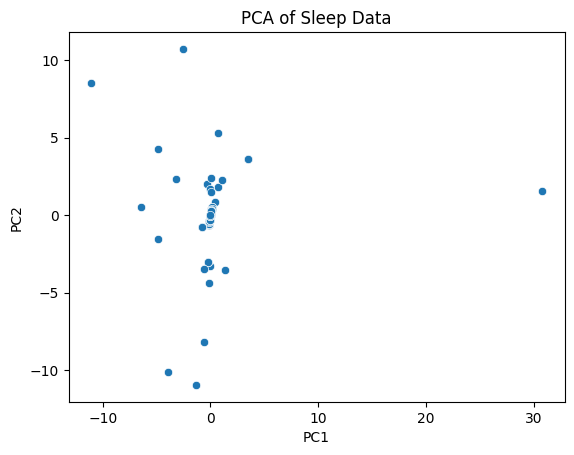

In [139]:
# Check explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Sleep Data')
plt.show()

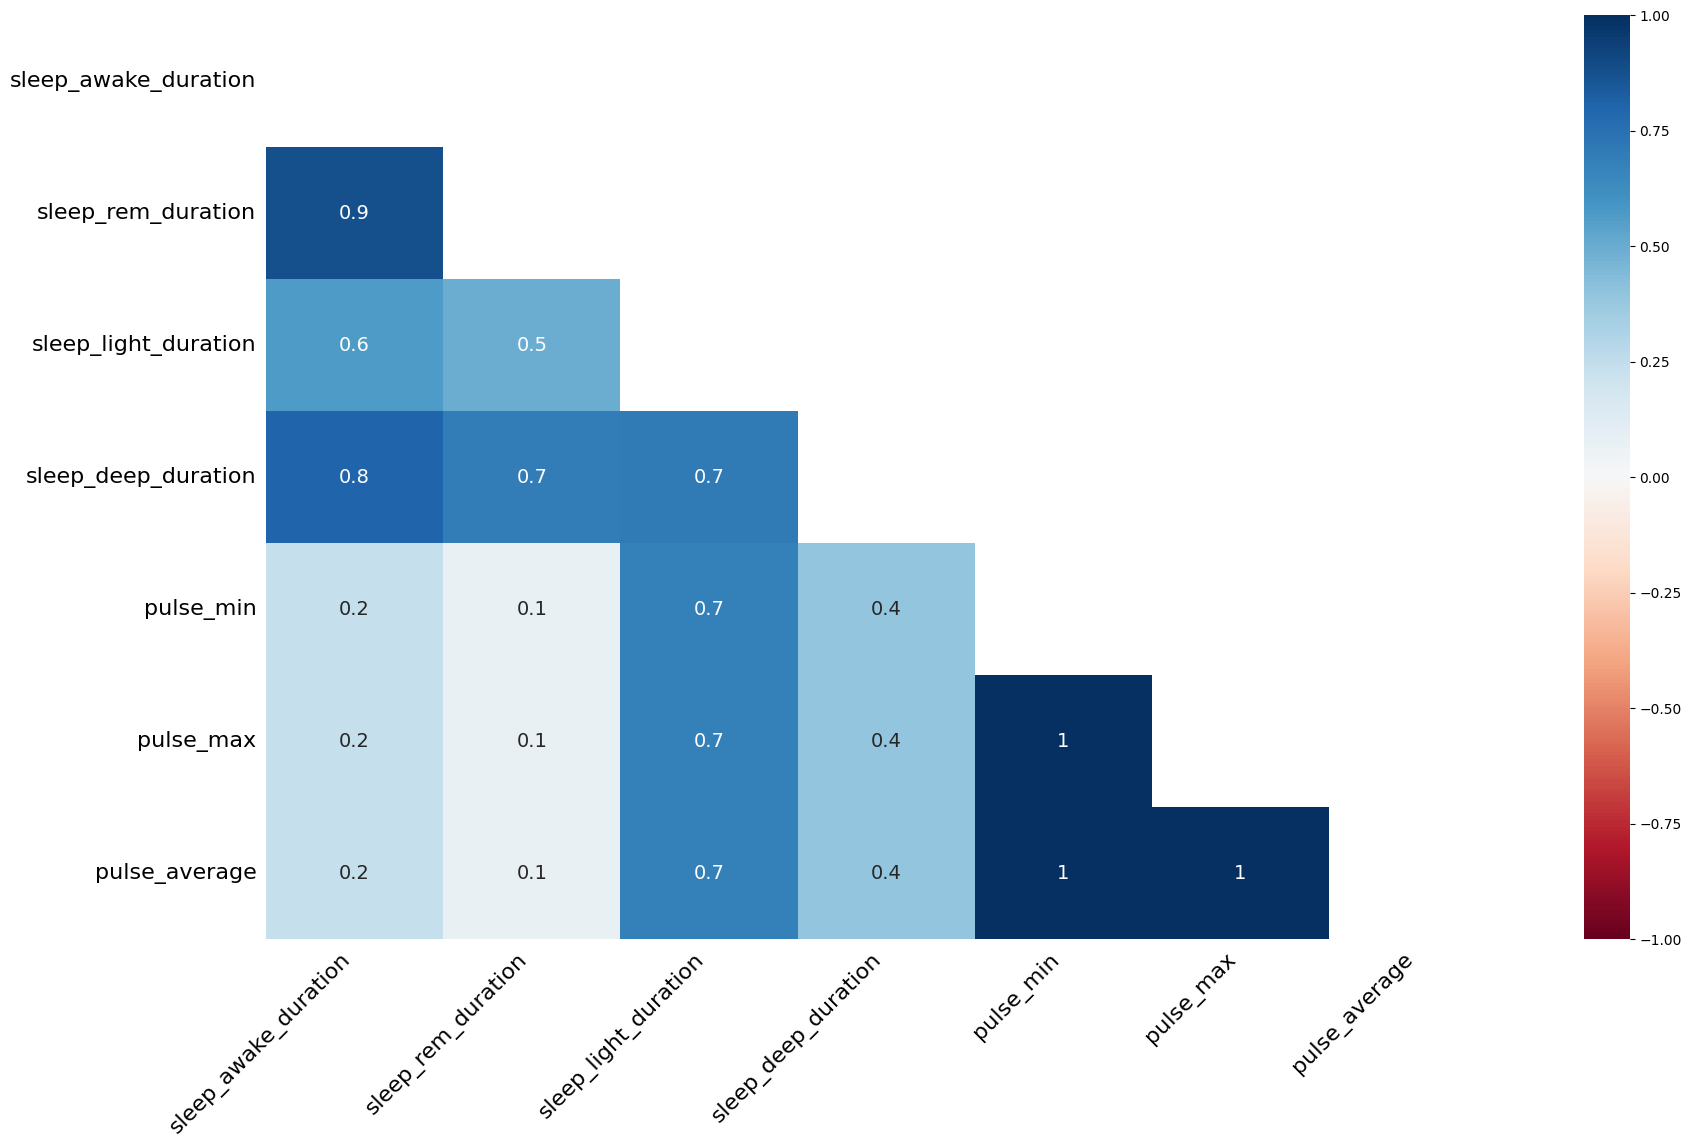

In [140]:
# Heatmap displaying frequency of missing values
msno.heatmap(sleep_df[numeric_columns])
plt.show()

In [141]:
scaled_df.dropna(subset=['sleep_awake_duration', 'sleep_rem_duration', 'sleep_light_duration', 'sleep_deep_duration', 'pulse_min', 'pulse_max', 'pulse_average'], how='all', inplace=True)

print('before\n', scaled_df.head())

scaler = StandardScaler()
scaled_df[['sleep_duration', 'sleep_light_duration']] = scaler.fit_transform(scaled_df[['sleep_duration', 'sleep_light_duration']])

print('after\n', scaled_df.head())

scaled_df['scaled_sleep'] = (scaled_df['sleep_duration'] + scaled_df['sleep_light_duration'] / 2)

# Drop SibSp and Parch
scaled_df.drop(['sleep_duration', 'sleep_light_duration'], axis=1, inplace=True)

print('after feature\n', scaled_df.head())

before
     user_code         day          sleep_begin            sleep_end  \
4  0d297d2410  2020-01-04  2020-01-04 01:27:25  2020-01-04 08:52:20   
6  0d297d2410  2020-01-06  2020-01-06 02:03:00  2020-01-06 07:11:00   
7  0d297d2410  2020-01-07  2020-01-07 01:09:51  2020-01-07 08:43:23   
8  0d297d2410  2020-01-08  2020-01-08 01:26:21  2020-01-08 08:46:28   
9  0d297d2410  2020-01-09  2020-01-09 00:38:11  2020-01-09 08:45:05   

   sleep_duration  sleep_awake_duration  sleep_rem_duration  \
4         26695.0                   NaN                 NaN   
6         18480.0                   NaN                 NaN   
7         27212.0                   NaN                 NaN   
8         26407.0                   NaN                 NaN   
9         29214.0                   NaN                 NaN   

   sleep_light_duration  sleep_deep_duration  pulse_min  pulse_max  \
4               21480.0                  NaN       55.0       95.0   
6               18480.0                  NaN  

Shape after cleaning: (425, 8)
    user_code         day          sleep_begin            sleep_end  \
0  0d297d2410  2019-12-31  2019-12-31 07:50:32  2019-12-31 08:45:22   
1  0d297d2410  2020-01-01  2020-01-01 04:13:41  2020-01-01 09:45:02   
2  0d297d2410  2020-01-02  2020-01-02 02:14:52  2020-01-02 08:06:00   
3  0d297d2410  2020-01-03  2020-01-03 00:10:00  2020-01-03 08:45:10   
4  0d297d2410  2020-01-04  2020-01-04 01:27:25  2020-01-04 08:52:20   

   sleep_duration  sleep_awake_duration  sleep_rem_duration  \
0          3290.0                   NaN                 NaN   
1         19881.0                   NaN                 NaN   
2         21068.0                   NaN                 NaN   
3         30910.0                   NaN                 NaN   
4         26695.0                   NaN                 NaN   

   sleep_light_duration  sleep_deep_duration  pulse_min  pulse_max  \
0                   NaN                  NaN        NaN        NaN   
1                   NaN

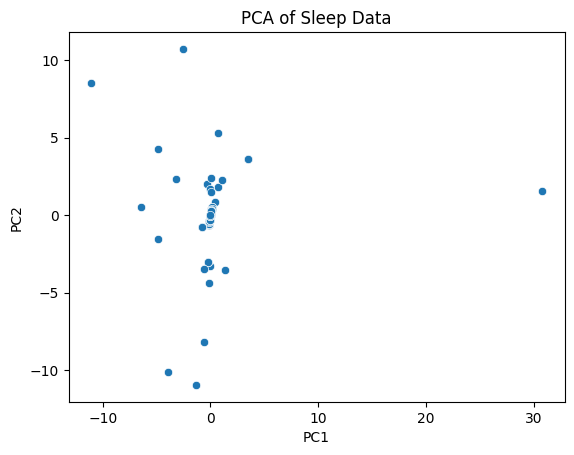

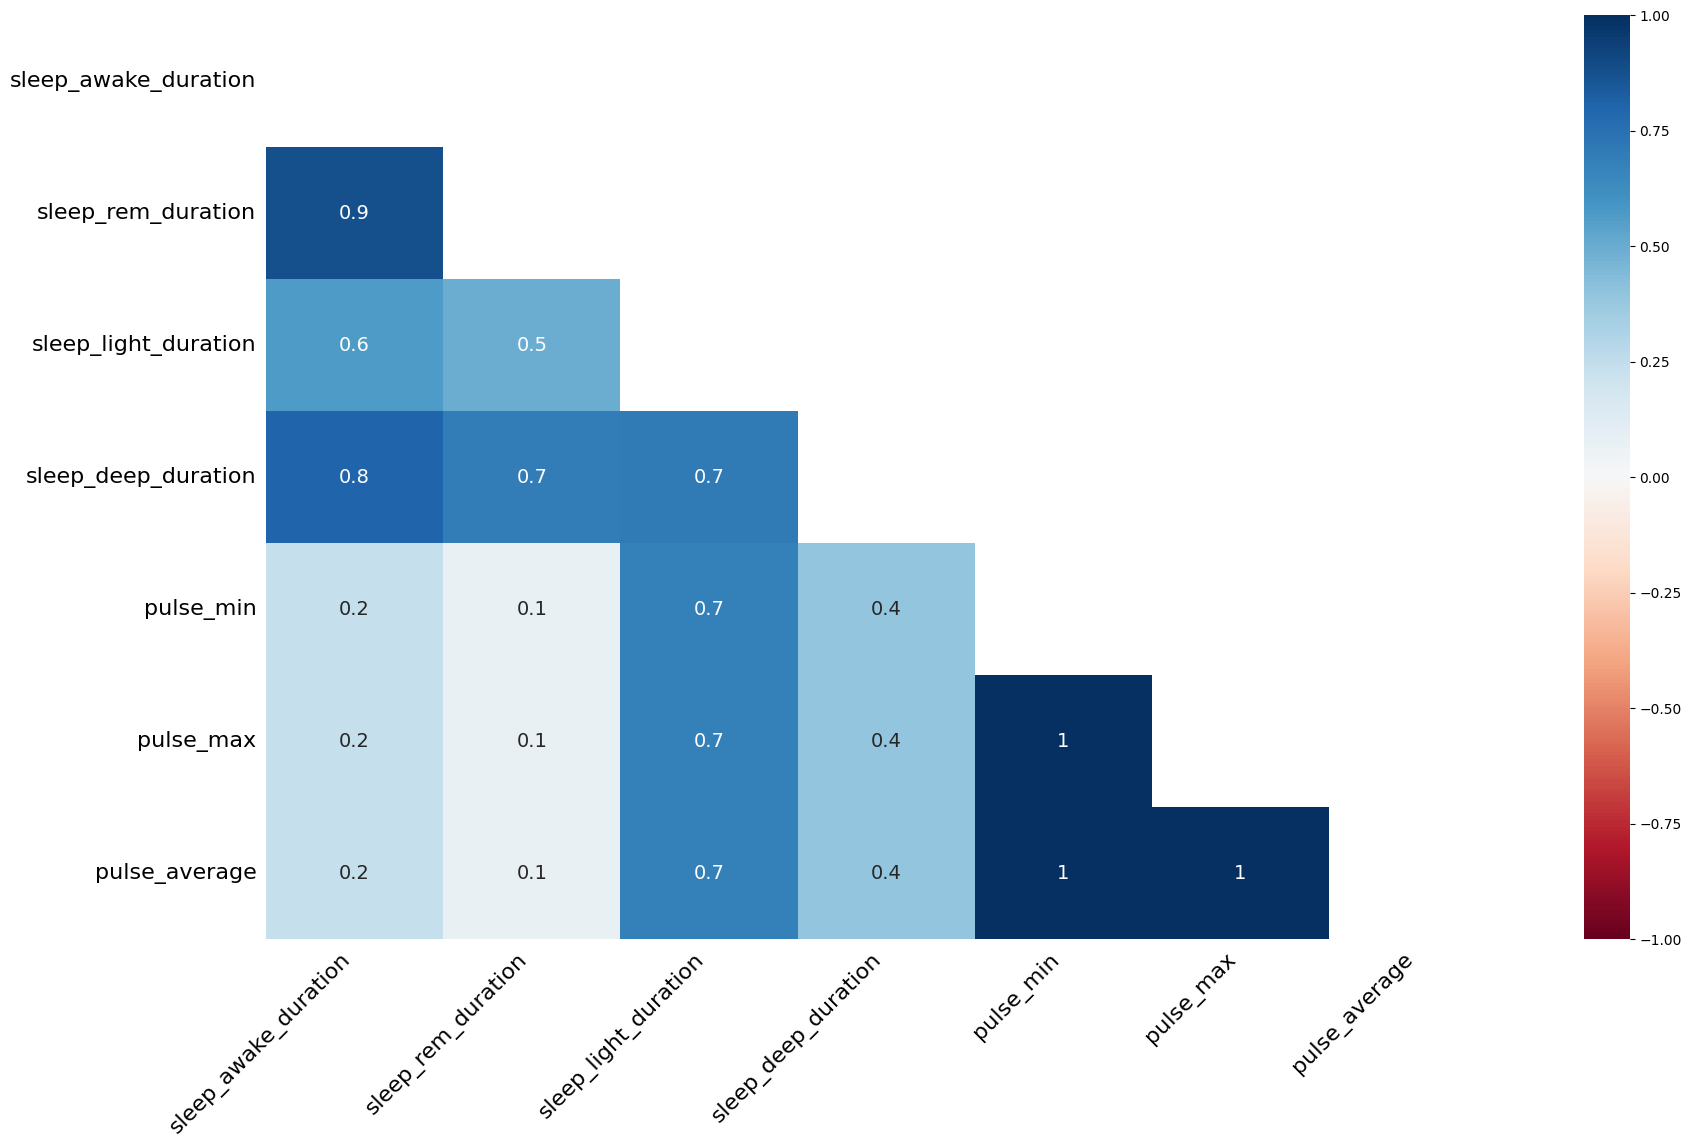

In [142]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data
sleep_df = pd.read_csv('/content/hrv-covid19/data/sleep.csv')

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define your numeric columns
numeric_columns = [
    'sleep_duration', 'sleep_awake_duration', 'sleep_rem_duration',
    'sleep_light_duration', 'sleep_deep_duration', 'pulse_min',
    'pulse_max', 'pulse_average'
]

# Handle missing values
sleep_df_clean = sleep_df[numeric_columns].copy()

# Optionally, drop columns with all NaNs
sleep_df_clean.dropna(axis=1, how='all', inplace=True)

# Fill missing values with column means
sleep_df_clean.fillna(sleep_df_clean.mean(), inplace=True)

# Check the shape after handling missing values
print("Shape after cleaning:", sleep_df_clean.shape)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sleep_df_clean)

# Determine the number of components
n_samples, n_features = scaled_data.shape
n_components = min(n_samples, n_features, 2)  # Adjust as necessary

# Apply PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Combine with the original DataFrame if needed
sleep_df_pca = pd.concat([sleep_df.reset_index(drop=True), pca_df], axis=1)

# Display the result
print(sleep_df_pca.head())


# Check explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the principal components if applicable
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Sleep Data')
plt.show()


import missingno as msno
msno.heatmap(sleep_df[numeric_columns])
plt.show()

In [143]:
#Transformation: Joining the two dataframes participant and blood pressure

blood_par_joined = pd.merge(blood_pressure_df, participants_df, on='user_code', how='left')
blood_par_joined.iloc[::5].head(5)

,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index,gender,age_range,city,country,height,weight,symptoms_onset
0,01bad5a519,2020-04-29 22:33:33,100.0,150.0,0.00,0.0,0.0,0.0,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020
5,01bad5a519,2020-05-01 09:58:06,80.0,130.0,0.00,0.0,0.0,0.0,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020
10,01bad5a519,2020-05-03 21:25:34,80.0,120.0,2.92,3800.0,16.0,114.0,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020
15,01bad5a519,2020-05-04 23:12:05,90.0,123.0,0.00,0.0,0.0,0.0,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020
20,01bad5a519,2020-05-11 20:15:55,80.0,118.0,0.00,0.0,0.0,0.0,m,45-54,St Petersburg,Russia,178.0,92.0,4/5/2020


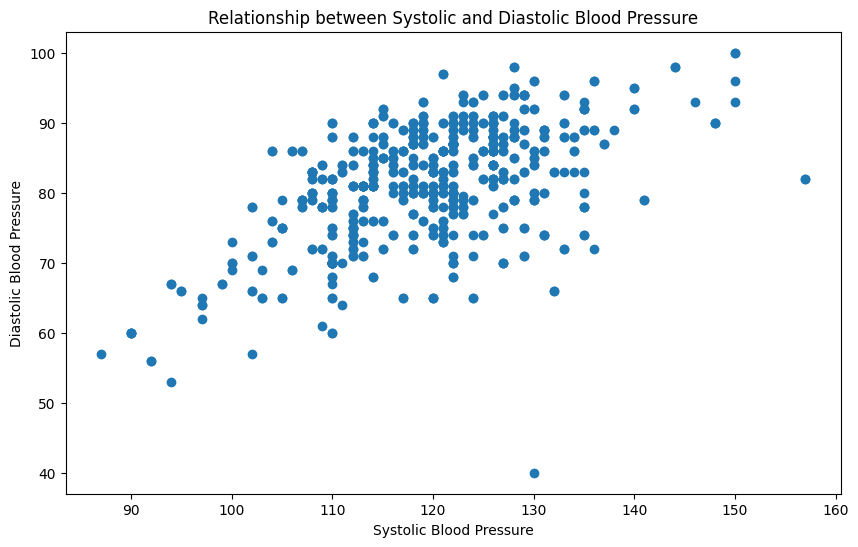

In [144]:
# Visualization of the joined table above

# using a scatter plot to visualize the relationship between systolic and diastolic pressure
plt.figure(figsize=(10, 6))
plt.scatter(blood_par_joined['systolic'], blood_par_joined['diastolic'])
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Relationship between Systolic and Diastolic Blood Pressure')
plt.show()


♈

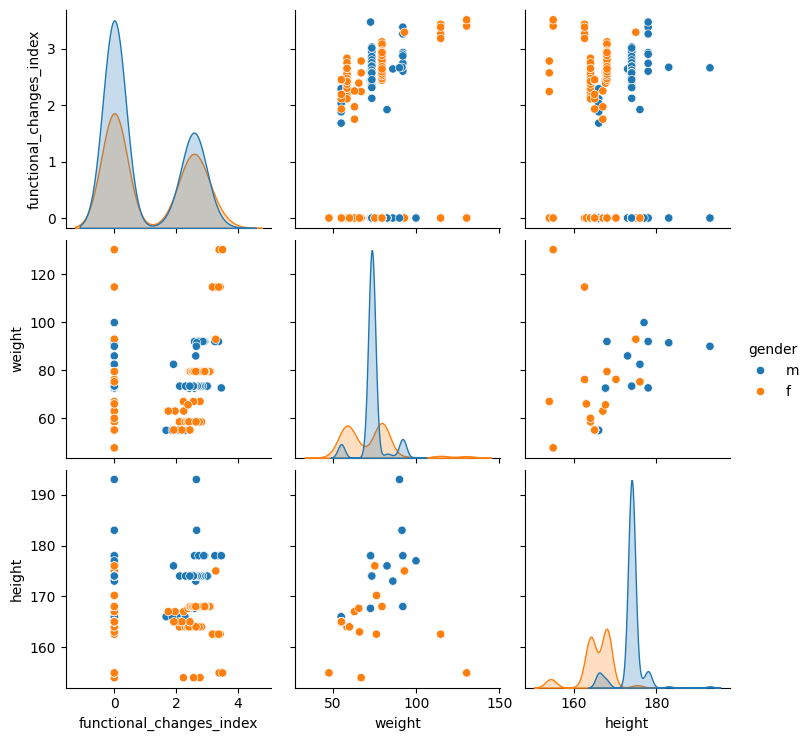

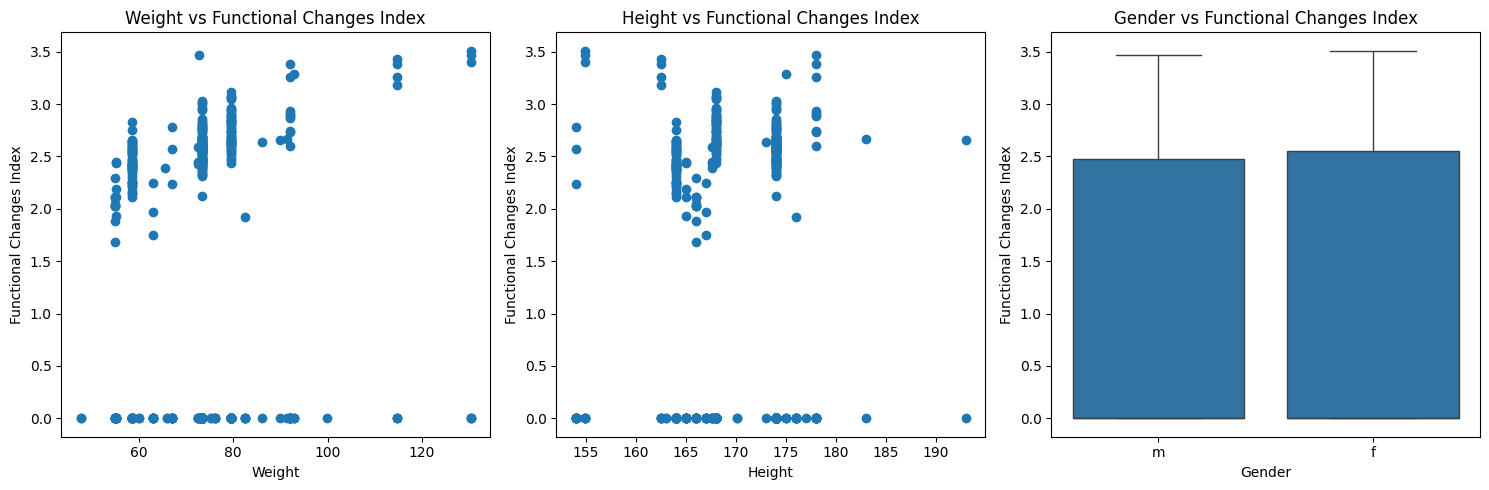

In [145]:

# Merge blood pressure and participants dataframes on user_code
blood_par_joined = pd.merge(blood_pressure_df, participants_df, on='user_code', how='left')

# Create a scatter plot matrix to visualize the relationship between functional_changes_index, weight, height, and gender
sns.pairplot(blood_par_joined, vars=['functional_changes_index', 'weight', 'height'], hue='gender')
plt.show()

# Create individual scatter plots to better visualize the relationship with functional_changes_index
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(blood_par_joined['weight'], blood_par_joined['functional_changes_index'])
plt.xlabel('Weight')
plt.ylabel('Functional Changes Index')
plt.title('Weight vs Functional Changes Index')

plt.subplot(1, 3, 2)
plt.scatter(blood_par_joined['height'], blood_par_joined['functional_changes_index'])
plt.xlabel('Height')
plt.ylabel('Functional Changes Index')
plt.title('Height vs Functional Changes Index')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='functional_changes_index', data=blood_par_joined)
plt.xlabel('Gender')
plt.ylabel('Functional Changes Index')
plt.title('Gender vs Functional Changes Index')

plt.tight_layout()
plt.show()


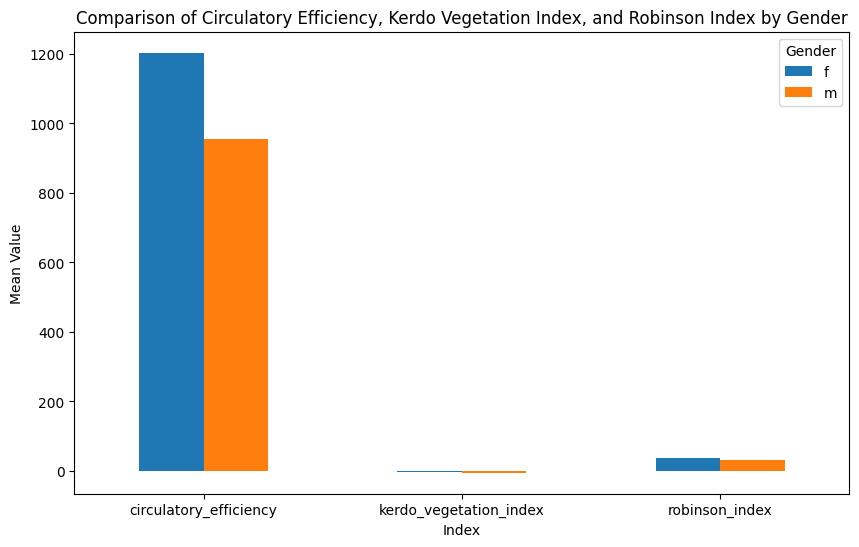

In [146]:

# Group data by gender and calculate the mean of circulatory efficiency, kerdo_vegetation_index, and robinson_index
gender_comparison = blood_par_joined.groupby('gender')[['circulatory_efficiency', 'kerdo_vegetation_index', 'robinson_index']].mean()

# Transpose the dataframe for easier plotting
gender_comparison = gender_comparison.transpose()

# Create a bar plot to compare the three indexes based on gender
gender_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Circulatory Efficiency, Kerdo Vegetation Index, and Robinson Index by Gender')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


Data Quality Assessment Discussion

Data Profiling

We've already conducted some basic data profiling through the use of .info(), .describe(), .isnull().sum(), and other functions.
We identified various aspects of the dataset, including:
* Data types of each column
* Descriptive statistics for numerical columns
* Number of missing values per column
* Potential outliers within the dataset.

Data Completeness

The dataset suffers from significant data completeness issues, particularly in columns related to sleep duration, wearable data, and blood pressure related indexes.
The presence of many null values reduces the reliability of analysis and potentially limits the insights we can gain from this data.
We addressed some of the null values by filling them in with 0 or by using interpolation.

Data Accuracy

The accuracy of the dataset is difficult to assess without access to external validation sources.
We can assume that the wearable devices themselves are generally accurate in measuring heart rate, sleep duration, etc.
However, the potential for errors due to user input or device malfunction is always present.
We can also examine outliers to analyze if there is an issue with the data's accuracy.
We mitigated outliers by applying interpolation techniques.

Data Consistency

The dataset displays some inconsistencies in terms of sampling rate and time stamps for different features and different users.
There is a significant difference in the frequency with which blood pressure, heart rate, and other features are collected, which can cause issues in analysis.
For example, some users have very few data points compared to others.
This inconsistency can pose challenges in time-series analysis, making comparisons and correlations difficult.

Data Integrity

Data integrity relates to the validity, accuracy, and consistency of the data.
We found duplicated values within the data which can reduce analysis efficiency.
Also, the presence of null values can impact data integrity because there is missing information.
We resolved a few aspects of data integrity issues by interpolating missing data and addressing outlier issues.


Data Lineage and Provenance

The dataset contains user health data collected from wearable devices and self-reported surveys.
Tracking its lineage and provenance is important for maintaining data integrity, reliability and security.
It is important to ensure proper access control is in place to protect sensitive health data.
The dataset has a clearly stated origin on GitHub and is available publicly through this source.
However, information about data collection procedures and device specifications could be enhanced for better provenance analysis.

Overall Assessment

This Welltory COVID-19 dataset has significant potential for research, particularly in understanding the impact of COVID-19 on health parameters.
However, the issues related to data quality limit its ability to be used effectively without proper mitigation.
Missing values and sampling rate inconsistencies can create biases in analysis and limit the insights that can be obtained.
We took some actions to address these issues, including data interpolation and outlier removal.
It is important to be aware of the potential biases and limitations when using this dataset.
Further processing and refinement of the data will likely be needed to perform sophisticated machine learning analysis on it.